In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)

# Data Wrangling and Creation of Final Dataframe for EDA

Using the preliminary csv file with household-level, vehicle, weather, and person-level data, we perform further cleaning and merge with dataset containing Places.

In [2]:
temp_df = pd.read_csv("merged_weather_VEH_1.csv", low_memory=False, index_col=False) # set low memory to false due to uncertain datatypes

In [3]:
temp_df

,Unnamed: 0.1,TDATE,ID,RELAT,GEND,AGE,HISP,NTVTY,LIC,USER,TRANS,FLEX,EMPLY,WKSTAT,JOBS,WLOC,WZIP,WDAYS,HOURS,WSCHED,COMPR,WMODE,INDUS,OCCUP,DISAB,TTRIP,TRNSUB,WTRIP,BTRIP,STUDE,SCHOL,SCITY,SSTAT,SZIP,SXCORD,SYCORD,SMODE,EDUCA,PTRIPS,TOLLF,HOVL,NOGOWHY,Moto_trip,Merged_RACE,Merged_TPTYP,Merged_CLIP,Merged_WXST,Merged_WDAY,Merged_DTYPE,Merged_SXST,Merged_TOLLR,Merged_TOLLB,INCEN,ILANG,AREA,STRATA,GTYPE,HHVEH,HHBIC,VEHNEW,RESTY,OWN,INCOM,HHSIZ,HHEMP,HHSTU,HHLIC,RECDate,DOW,HTRIPS,HCITY,HSTAT,HZIP,VEHOP,HPFlag,HCTRACT,HPrimaryCity,HHWGT,EXPHHWGT,Merged_BUYER,Merged_HHNOV,Merged_LDPER,simplified city,day_name,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_mean (°C),daylight_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),Unnamed: 0,Year of vehicle,Vehicle body type,Primary fuel type,Vehicle acquired,Vehicle ownership type,Vehicle transmission type,Vehicle drive type,Vehicle cylinder count,Vehicle type,was vehicle used on travel day,reason why not
0,0,2012-02-01,1138101_2,9.0,1.0,61.0,2.0,1.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,5.0,2.0,"[1.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan]","[nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[4.0, 3.0, 5.0, 6.0, nan, nan, nan]","[nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1,1,12,22,2,1,0,2,4,2,2,2,0,0,1,2012-01-18,3,2,BAKERSFIELD,CA,93301,1.0,2,600,BAKERSFIELD,2.120607,621.382358,"[nan, nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan]",Central California,Wednesday,3.0,15.9,4.3,10.1,8.2,37358.36,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2012-02-01,1120264_1,1.0,1.0,51.0,9.0,1.0,1.0,1.0,2.0,2.0,1.0,NaN,1.0,1.0,94534,5.0,48.0,2.0,1.0,5.0,48.0,11.0,2.0,0.0,NaN,5.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,3.0,2.0,NaN,1.0,"[99.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan]","[nan, nan]","[8.0, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",2,1,34,24,2,4,3,1,1,1,8,3,2,0,3,2012-01-16,3,7,PATTERSON,CA,95363,4.0,2,3202,PATTERSON,1.118909,327.863895,"[2.0, 1.0, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan]","[1.0, nan, nan, nan, nan, nan, nan, nan]",Central California,Wednesday,3.0,15.9,4.3,10.1,8.2,37358.36,0.0,0.0,0.0,0.0,440.0,2009.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,NaN
2,2,2012-02-01,1120264_2,2.0,2.0,51.0,9.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,2.0,3.0,95376,4.0,30.0,3.0,2.0,5.0,62.0,29.0,2.0,0.0,NaN,7.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,3.0,2.0,NaN,1.0,"[99.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan]","[nan, nan]","[98.0, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",2,1,34,24,2,4,3,1,1,1,8,3,2,0,3,2012-01-16,3,7,PATTERSON,CA,95363,4.0,2,3202,PATTERSON,1.118909,327.863895,"[2.0, 1.0, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan]","[1.0, nan, nan, nan, nan, nan, nan, nan]",Central California,Wednesday,3.0,15.9,4.3,10.1,8.2,37358.36,0.0,0.0,0.0,0.0,441.0,2004.0,5.0,1.0,1.0,1.0,1.0,2.0,4.0,2.0,1.0,NaN
3,3,2012-02-01,1120264_3,3.0,1.0,26.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,98.0,2.0,3.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,NaN,NaN,12.0,2.0,"[99.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan]","[nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan

The dataset "merged_weather" that we are working with at this stage is too large and contains unneccessary columns. Let's first further simplify the dataframe by removing the following columns. These columns do not all provide meaningful data and to further simplify and clean the data, the following processing decisions were made:
- Columns were dropped if they were deemed irrelevant, redundant, or had severe class imbalance that would introduce significant bias or variance errors
- Columns with information that would result in data leakage. For example, columns with information regarding why a vehicle was not used for a trip results in the model automatically inferring that a vehicle was not used, thus revealing outcomes directly. This gives the model an unfair advantage and is not information that is not available during prediction.

In [4]:
columns = ['AREA',
          'USER',
          'COMPR',
          'DOW',
          'HCTRACT',
          'HSTAT',
          'ILANG',
          'HPFlag',
          'Merged_BUYER',
          'Merged_CLIP',
          'Merged_HHNOV',
          'Merged_LDPER',
          'Merged_SXST',
          'Merged_TOLLB',
          'Merged_TOLLR',
          'Merged_TPTYP',
          'Merged_WXST',
          'RECDate',
          'RELAT',
          'SSTAT',
          'SXCORD',
          'SYCORD',
          'Unnamed: 0',
          'Unnamed: 0.1',
          'Vehicle drive type',
          'day_name',
          'simplified city',
          'NOGOWHY',
          'reason why not',
          'HHWGT',
          'EXPHHWGT'
          ]

In [5]:
temp_df.drop(columns=columns, inplace=True)
temp_df.head()

,TDATE,ID,GEND,AGE,HISP,NTVTY,LIC,TRANS,FLEX,EMPLY,WKSTAT,JOBS,WLOC,WZIP,WDAYS,HOURS,WSCHED,WMODE,INDUS,OCCUP,DISAB,TTRIP,TRNSUB,WTRIP,BTRIP,STUDE,SCHOL,SCITY,SZIP,SMODE,EDUCA,PTRIPS,TOLLF,HOVL,Moto_trip,Merged_RACE,Merged_WDAY,Merged_DTYPE,INCEN,STRATA,GTYPE,HHVEH,HHBIC,VEHNEW,RESTY,OWN,INCOM,HHSIZ,HHEMP,HHSTU,HHLIC,HTRIPS,HCITY,HZIP,VEHOP,HPrimaryCity,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_mean (°C),daylight_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),Year of vehicle,Vehicle body type,Primary fuel type,Vehicle acquired,Vehicle ownership type,Vehicle transmission type,Vehicle cylinder count,Vehicle type,was vehicle used on travel day
0,2012-02-01,1138101_2,1.0,61.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,0.0,NaN,3.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,2.0,"[1.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[4.0, 3.0, 5.0, 6.0, nan, nan, nan]",1,22,2,1,0,2,4,2,2,2,0,0,1,2,BAKERSFIELD,93301,1.0,BAKERSFIELD,3.0,15.9,4.3,10.1,8.2,37358.36,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-02-01,1120264_1,1.0,51.0,9.0,1.0,1.0,2.0,2.0,1.0,NaN,1.0,1.0,94534,5.0,48.0,2.0,5.0,48.0,11.0,2.0,0.0,NaN,5.0,0.0,3.0,NaN,NaN,NaN,NaN,4.0,5.0,3.0,2.0,1.0,"[99.0, nan, nan, nan]","[8.0, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",2,24,2,4,3,1,1,1,8,3,2,0,3,7,PATTERSON,95363,4.0,PATTERSON,3.0,15.9,4.3,10.1,8.2,37358.36,0.0,0.0,0.0,0.0,2009.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0
2,2012-02-01,1120264_2,2.0,51.0,9.0,1.0,1.0,2.0,2.0,1.0,NaN,2.0,3.0,95376,4.0,30.0,3.0,5.0,62.0,29.0,2.0,0.0,NaN,7.0,1.0,3.0,NaN,NaN,NaN,NaN,6.0,2.0,3.0,2.0,1.0,"[99.0, nan, nan, nan]","[98.0, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",2,24,2,4,3,1,1,1,8,3,2,0,3,7,PATTERSON,95363,4.0,PATTERSON,3.0,15.9,4.3,10.1,8.2,37358.36,0.0,0.0,0.0,0.0,2004.0,5.0,1.0,1.0,1.0,1.0,4.0,2.0,1.0
3,2012-02-01,1120264_3,1.0,26.0,2.0,1.0,1.0,2.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,98.0,2.0,3.0,2.0,3.0,NaN,NaN,NaN,NaN,5.0,0.0,NaN,NaN,2.0,"[99.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",2,24,2,4,3,1,1,1,8,3,2,0,3,7,PATTERSON,95363,4.0,PATTERSON,3.0,15.9,4.3,10.1,8.2,37358.36,0.0,0.0,0.0,0.0,2004.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0
4,2012-02-01,1120296_1,2.0,58.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,2.0,5.0,NaN,3.0,NaN,NaN,NaN,NaN,3.0,6.0,NaN,NaN,2.0,"[97.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[4.0, nan, nan, nan, nan, nan, nan]",1,23,2,0,0,2,6,2,1,1,0,0,0,6,WATSONVILLE,95076,NaN,WATSONVILLE,51.0,13.1,6.0,9.1,7.5,37228.98,0.2,0.2,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_to_merge = pd.read_csv('cleaned_places_df.csv', low_memory=False).set_index("hh_person_id")

In [7]:
df_to_merge

,Total number of people traveling on trip,Number of household members on trip,Assigned travel day,Duration of trip,Duration of activity,Zip code,Trip distance,Time of arrival,Time of departure,city_from_zip,mode_category
hh_person_id,,,,,,,,,,,
1031985_1,2.0,0.0,1.0,22.0,231,94510,13.428271,09:02,12:53,San Francisco Bay Area,Auto
1031985_1,2.0,0.0,NaN,20.0,826,94591,12.975526,13:13,02:59,San Francisco Bay Area,Auto
1031985_2,1.0,0.0,1.0,10.0,77,94589,5.125961,09:26,10:43,San Francisco Bay Area,Auto
1031985_2,1.0,0.0,NaN,13.0,963,94591,5.126981,10:56,02:59,San Francisco Bay Area,Auto
1032036_1,3.0,2.0,1.0,20.0,415,92128,3.619057,08:35,15:30,Greater Los Angeles Area,Auto
...,...,...,...,...,...,...,...,...,...,...,...
7211560_4,2.0,1.0,1.0,45.0,286,95117,12.978730,08:09,12:55,San Francisco Bay Area,Auto
7211560_4,2.0,1.0,1.0,8.0,23,95117,2.240663,13:03,13:26,San Francisco Bay Area,Auto
7211560_4,2.0,1.0,NaN,18.0,795,95148,12.284206,13:44,02:59,San Francisco Bay Area,Auto


In [8]:
# Compare the sizes of the DataFrames
print(f"Number of rows in df_to_merge: {df_to_merge.shape[0]}")
print(f"Number of rows in temp_df: {temp_df.shape[0]}")

# Check for unique IDs in temp_df to ensure they match df_to_merge index
print(f"Number of unique IDs in df_to_merge: {df_to_merge.index.nunique()}")
print(f"Number of unique IDs in temp_df: {temp_df['ID'].nunique()}")

Number of rows in df_to_merge: 290067
Number of rows in temp_df: 109113
Number of unique IDs in df_to_merge: 69399
Number of unique IDs in temp_df: 109113


In [9]:
def final_merge(temp_df, df_to_merge):
     # Step 1: Set "ID" as the index for temp_df
     temp_df = temp_df.set_index('ID')

     # Step 2: Filter df_to_merge to keep only rows corresponding to IDs in filtered_df
     temp_df_filtered = temp_df[temp_df.index.isin(df_to_merge.index.get_level_values('hh_person_id'))]

     # Step 3: Map individual-level data to trip-level data
     expanded_individual_df = df_to_merge.index.to_series().map(temp_df_filtered.to_dict('index'))

     # Step 4: Convert the resulting Series of dictionaries into a DataFrame
     expanded_individual_df = pd.DataFrame(list(expanded_individual_df))

     # Step 5: Align the index with filtered_df
     expanded_individual_df.index = df_to_merge.index

     # Step 6: Combine trip-level data with expanded individual-level data
     final_df = pd.concat([df_to_merge, expanded_individual_df], axis=1)

     # Step 7: Filter final_df to include only rows with a recorded trip in 'Trip distance'
     final_df = final_df[final_df['Trip distance'].notnull()]
     return final_df

In [10]:
final_df = final_merge(temp_df,df_to_merge)
# Verify the updated shape and data after filtering
print(f"Final DataFrame shape after filtering for recorded trips: {final_df.shape}")
print(final_df.head())

Final DataFrame shape after filtering for recorded trips: (290067, 85)
              Total number of people traveling on trip  \
hh_person_id                                             
1031985_1                                          2.0   
1031985_1                                          2.0   
1031985_2                                          1.0   
1031985_2                                          1.0   
1032036_1                                          3.0   

              Number of household members on trip  Assigned travel day  \
hh_person_id                                                             
1031985_1                                     0.0                  1.0   
1031985_1                                     0.0                  NaN   
1031985_2                                     0.0                  1.0   
1031985_2                                     0.0                  NaN   
1032036_1                                     2.0                  1.0   

   

In [11]:
final_df

,Total number of people traveling on trip,Number of household members on trip,Assigned travel day,Duration of trip,Duration of activity,Zip code,Trip distance,Time of arrival,Time of departure,city_from_zip,mode_category,TDATE,GEND,AGE,HISP,NTVTY,LIC,TRANS,FLEX,EMPLY,WKSTAT,JOBS,WLOC,WZIP,WDAYS,HOURS,WSCHED,WMODE,INDUS,OCCUP,DISAB,TTRIP,TRNSUB,WTRIP,BTRIP,STUDE,SCHOL,SCITY,SZIP,SMODE,EDUCA,PTRIPS,TOLLF,HOVL,Moto_trip,Merged_RACE,Merged_WDAY,Merged_DTYPE,INCEN,STRATA,GTYPE,HHVEH,HHBIC,VEHNEW,RESTY,OWN,INCOM,HHSIZ,HHEMP,HHSTU,HHLIC,HTRIPS,HCITY,HZIP,VEHOP,HPrimaryCity,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_mean (°C),daylight_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),Year of vehicle,Vehicle body type,Primary fuel type,Vehicle acquired,Vehicle ownership type,Vehicle transmission type,Vehicle cylinder count,Vehicle type,was vehicle used on travel day
hh_person_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1031985_1,2.0,0.0,1.0,22.0,231,94510,13.428271,09:02,12:53,San Francisco Bay Area,Auto,2012-05-01,1.0,74.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,4.0,0.0,3.0,NaN,NaN,NaN,NaN,6.0,2.0,3.0,2.0,1.0,"[1.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",1,10,1,2,2,1,1,1,3,2,0,0,2,4,VALLEJO,94591,2.0,VALLEJO,3.0,17.5,9.1,12.6,8.7,49646.25,0.0,0.0,0.0,0.0,2006.0,1.0,1.0,2.0,1.0,1.0,4.0,2.0,1.0
1031985_1,2.0,0.0,NaN,20.0,826,94591,12.975526,13:13,02:59,San Francisco Bay Area,Auto,2012-05-01,1.0,74.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,4.0,0.0,3.0,NaN,NaN,NaN,NaN,6.0,2.0,3.0,2.0,1.0,"[1.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",1,10,1,2,2,1,1,1,3,2,0,0,2,4,VALLEJO,94591,2.0,VALLEJO,3.0,17.5,9.1,12.6,8.7,49646.25,0.0,0.0,0.0,0.0,2006.0,1.0,1.0,2.0,1.0,1.0,4.0,2.0,1.0
1031985_2,1.0,0.0,1.0,10.0,77,94589,5.125961,09:26,10:43,San Francisco Bay Area,Auto,2012-05-01,2.0,73.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,4.0,0.0,3.0,NaN,NaN,NaN,NaN,6.0,2.0,3.0,2.0,1.0,"[1.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",1,10,1,2,2,1,1,1,3,2,0,0,2,4,VALLEJO,94591,2.0,VALLEJO,3.0,17.5,9.1,12.6,8.7,49646.25,0.0,0.0,0.0,0.0,1987.0,5.0,1.0,2.0,1.0,NaN,NaN,2.0,2.0
1031985_2,1.0,0.0,NaN,13.0,963,94591,5.126981,10:56,02:59,San Francisco Bay Area,Auto,2012-05-01,2.0,73.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,4.0,0.0,3.0,NaN,NaN,NaN,NaN,6.0,2.0,3.0,2.0,1.0,"[1.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",1,10,1,2,2,1,1,1,3,2,0,0,2,4,VALLEJO,94591,2.0,VALLEJO,3.0,17.5,9.1,12.6,8.7,49646.25,0.0,0.0,0.0,0.0,1987.0,5.0,1.0,2.0,1.0,NaN,NaN,2.0,2.0
1032036_1,3.0,2.0,1.0,20.0,415,92128,3.619057,08:35,15:30,Greater Los Angeles Area,Auto,2012-05-12,1.0,46.0,2.0,1.0,1.0,2.0,2.0,1.0,NaN,1.0,1.0,92127,5.0,40.0,2.0,2.0,54.0,15.0,2.0,0.0,NaN,5.0,2.0,3.0,NaN,NaN,NaN,NaN,6.0,5.0,3.0,1.0,1.0,"[1.0, nan, nan, nan]","[8.0, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",1,14,1,1,4,1,1,1,7,5,1,3,2,31,SAN DIEGO,92127,1.0,SAN DIEGO,3.0,19.6,11.7,15.8,15.1,49637.03,0.0,0.0,0.0,0.0,2007.0,8.0,1.0,1.0,1.0,1.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211560_4,2.0,1.0,1.0,45.0,286,95117,12.978730,08:09,12:55,San Francisco Bay Area,Auto,2013-01-30,1.0,12.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,6.0,3.0,1.0,3.0,SAN JOS

In [12]:
final_df.to_csv('Final_Merged_df.csv')

In [13]:
# Calculate the number of trips per agent
trips_per_agent = final_df.groupby('hh_person_id').size()

# Calculate the average number of trips
average_trips_per_agent = trips_per_agent.mean()

print(f"Average number of trips per agent: {average_trips_per_agent:.2f}")

Average number of trips per agent: 4.18


In [14]:
import pandas as pd

def get_missing_value_summary(df, threshold=10):
    """
    Returns a DataFrame summarizing columns with a missing value percentage above the specified threshold.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        threshold (float): The minimum percentage of missing values to include a column (default is 10%).
    
    Returns:
        pd.DataFrame: A DataFrame with columns for column names and their missing value percentages.
    """
    # Calculate the percentage of missing values for each column
    missing_percentage = df.isnull().mean() * 100
    
    # Filter columns that have missing values above the threshold
    columns_above_threshold = missing_percentage[missing_percentage > threshold]
    
    # Create a DataFrame summarizing the results
    summary_df = pd.DataFrame({
        'Column': columns_above_threshold.index,
        'Missing Percentage': columns_above_threshold.values
    }).sort_values(by='Missing Percentage', ascending=False)
    
    return summary_df

In [15]:
# Example usage:
missing_summary_df = get_missing_value_summary(final_df, threshold=0)

from IPython.display import display

# Display the DataFrame in the notebook
display(missing_summary_df)

,Column,Missing Percentage
23,SMODE,77.597245
22,SZIP,77.595866
21,SCITY,77.595866
20,SCHOL,75.994167
18,TRNSUB,73.437171
8,WKSTAT,69.933498
11,WZIP,54.228161
15,WMODE,54.191618
2,Assigned travel day,47.997187
13,HOURS,45.900430


The columns above have missing values that need to be handled. We will need to reorganize the data for clearer understanding.

In [16]:
columns = final_df.columns

# Convert column names to a DataFrame
columns_df = pd.DataFrame(columns, columns=["Column Names"])

# Export to a CSV file. We will use this file to update the naming of the columns within the dataframe manually, as it is easier to do so using Excel.
columns_df.to_csv("Columns_output.csv", index=False)

In [17]:
# Remapping of the column names. 
columns_organized = pd.read_csv("Columns_organized.csv")
remapping = dict(zip(columns_organized["Column Names"], columns_organized["Remapping"]))
final_df.rename(columns=remapping, inplace=True)

In [18]:
final_df

,tottr,hhmem,assn,duration_min,act_dur,zipcode,trip_distance_miles,arr_time,dep_time,city_from_zip,mode_category,travel_date,gender,age,hispanic_flag,citizen,driver_license,transit_pass,car_sharing,employment,empl_status,job_count,empl_sec_loc,empl_zipcode,workday_count,hour_per_week,workday_flex,commute_mode,empl_industry,empl_occupation,disabled,transit_trip,transit_subsidy,walk_trips,bike_trips,student,school_grade,school_city,school_zipcode,school_mode,education,person_trips,toll_use,hov_lane,motor_trip,race,workday_range,dis_type,incentive,strata,gps_type,vehicle_count,bike_count,vehicle_new,residence_type,home_own,income,persons_count,worker_count,student_count,license_count,trip_count,home_city,home_zipcode,vehicle_op_count,home_primarycity,WMO_code,amb_temp_max (C),amb_temp_min (C),amb_temp_mean (C),apparent_temp_mean (C),daulight_dur (s),total_ precip (mm),rain (mm),snowfall (cm),precip_hours (h),model_year,body_type,fuel_type1,purchase_type,ownership,transmission,cylinders,veh_type,vehicle_used
hh_person_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1031985_1,2.0,0.0,1.0,22.0,231,94510,13.428271,09:02,12:53,San Francisco Bay Area,Auto,2012-05-01,1.0,74.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,4.0,0.0,3.0,NaN,NaN,NaN,NaN,6.0,2.0,3.0,2.0,1.0,"[1.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",1,10,1,2,2,1,1,1,3,2,0,0,2,4,VALLEJO,94591,2.0,VALLEJO,3.0,17.5,9.1,12.6,8.7,49646.25,0.0,0.0,0.0,0.0,2006.0,1.0,1.0,2.0,1.0,1.0,4.0,2.0,1.0
1031985_1,2.0,0.0,NaN,20.0,826,94591,12.975526,13:13,02:59,San Francisco Bay Area,Auto,2012-05-01,1.0,74.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,4.0,0.0,3.0,NaN,NaN,NaN,NaN,6.0,2.0,3.0,2.0,1.0,"[1.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",1,10,1,2,2,1,1,1,3,2,0,0,2,4,VALLEJO,94591,2.0,VALLEJO,3.0,17.5,9.1,12.6,8.7,49646.25,0.0,0.0,0.0,0.0,2006.0,1.0,1.0,2.0,1.0,1.0,4.0,2.0,1.0
1031985_2,1.0,0.0,1.0,10.0,77,94589,5.125961,09:26,10:43,San Francisco Bay Area,Auto,2012-05-01,2.0,73.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,4.0,0.0,3.0,NaN,NaN,NaN,NaN,6.0,2.0,3.0,2.0,1.0,"[1.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",1,10,1,2,2,1,1,1,3,2,0,0,2,4,VALLEJO,94591,2.0,VALLEJO,3.0,17.5,9.1,12.6,8.7,49646.25,0.0,0.0,0.0,0.0,1987.0,5.0,1.0,2.0,1.0,NaN,NaN,2.0,2.0
1031985_2,1.0,0.0,NaN,13.0,963,94591,5.126981,10:56,02:59,San Francisco Bay Area,Auto,2012-05-01,2.0,73.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,4.0,0.0,3.0,NaN,NaN,NaN,NaN,6.0,2.0,3.0,2.0,1.0,"[1.0, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",1,10,1,2,2,1,1,1,3,2,0,0,2,4,VALLEJO,94591,2.0,VALLEJO,3.0,17.5,9.1,12.6,8.7,49646.25,0.0,0.0,0.0,0.0,1987.0,5.0,1.0,2.0,1.0,NaN,NaN,2.0,2.0
1032036_1,3.0,2.0,1.0,20.0,415,92128,3.619057,08:35,15:30,Greater Los Angeles Area,Auto,2012-05-12,1.0,46.0,2.0,1.0,1.0,2.0,2.0,1.0,NaN,1.0,1.0,92127,5.0,40.0,2.0,2.0,54.0,15.0,2.0,0.0,NaN,5.0,2.0,3.0,NaN,NaN,NaN,NaN,6.0,5.0,3.0,1.0,1.0,"[1.0, nan, nan, nan]","[8.0, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]",1,14,1,1,4,1,1,1,7,5,1,3,2,31,SAN DIEGO,92127,1.0,SAN DIEGO,3.0,19.6,11.7,15.8,15.1,49637.03,0.0,0.0,0.0,0.0,2007.0,8.0,1.0,1.0,1.0,1.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211560_4,2.0,1.0,1.0,45.0,286,95117,12.978730,08:09,12:55,San Francisco Bay Area,Auto,2013-01-30,1.0,12.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.

In [19]:
final_df.describe()

,tottr,hhmem,assn,duration_min,act_dur,trip_distance_miles,gender,age,hispanic_flag,citizen,driver_license,transit_pass,car_sharing,employment,empl_status,job_count,empl_sec_loc,workday_count,hour_per_week,workday_flex,commute_mode,empl_industry,empl_occupation,disabled,transit_trip,transit_subsidy,walk_trips,bike_trips,student,school_grade,school_mode,education,person_trips,toll_use,hov_lane,motor_trip,incentive,strata,gps_type,vehicle_count,bike_count,vehicle_new,residence_type,home_own,income,persons_count,worker_count,student_count,license_count,trip_count,home_zipcode,vehicle_op_count,WMO_code,amb_temp_max (C),amb_temp_min (C),amb_temp_mean (C),apparent_temp_mean (C),daulight_dur (s),total_ precip (mm),rain (mm),snowfall (cm),precip_hours (h),model_year,body_type,fuel_type1,purchase_type,ownership,transmission,cylinders,veh_type,vehicle_used
count,232965.000000,232965.000000,150843.000000,290067.000000,290067.000000,290067.000000,290067.000000,290067.000000,290067.000000,290067.000000,244149.000000,244138.000000,244127.000000,244138.000000,87213.000000,156925.000000,156925.000000,156925.000000,156925.000000,156925.000000,132875.000000,156925.000000,156925.000000,290067.000000,290067.000000,77050.000000,290067.000000,204931.000000,290067.000000,69633.000000,64983.000000,290067.000000,290067.000000,259088.000000,259088.000000,288090.000000,290067.000000,290067.000000,290067.000000,290067.000000,290067.000000,290067.000000,290067.000000,290067.000000,290067.000000,290067.000000,290067.000000,290067.000000,290067.000000,290067.000000,290067.000000,276997.000000,271591.000000,271591.000000,271591.000000,271591.000000,271591.000000,271591.000000,271591.000000,271591.000000,271591.000000,271591.000000,197859.000000,202342.000000,203028.000000,202241.000000,202735.000000,198744.000000,174986.000000,202322.000000,203213.000000
mean,1.989840,0.789247,1.151243,20.100718,222.801105,9.091364,1.545153,75.939400,1.816267,1.201216,1.107262,1.883906,2.006349,1.372490,3.816117,1.348103,1.372828,4.697875,72.290483,1.962842,6.531191,58.140379,31.410572,1.965356,3.768453,2.054380,8.146459,2.630359,2.580542,6.305473,7.195097,3.581641,6.010387,3.025443,3.446223,1.100670,1.358500,9.978012,1.818476,2.016120,2.077348,2.083353,1.833876,1.256699,12.693929,3.307115,1.490359,1.157364,2.085884,15.882403,93198.372562,2.111539,12.201977,23.231813,12.007818,17.233446,16.198660,44560.686486,0.987025,0.965658,0.015136,1.459931,2003.122688,2.821896,1.044304,1.446517,1.058495,1.152563,3.279657,1.988736,1.195962
std,1.269167,1.098188,0.572072,29.080382,260.035103,72.057628,0.632071,176.557596,0.827059,0.550028,0.403828,0.561983,0.382452,0.591349,9.867335,5.011548,0.740739,1.239179,182.338362,0.990666,5.065470,19.546219,20.197885,0.409709,12.582020,1.105537,17.289706,12.446148,0.854047,14.063930,8.604621,1.953553,3.511532,0.644837,11.945724,0.300892,0.479561,7.720823,0.523615,1.005293,3.878812,2.033434,3.738492,0.578840,24.891754,1.527557,0.889978,1.258804,0.893200,10.269576,1724.639136,0.925970,21.297812,7.279866,4.941037,5.798909,6.801995,5775.007676,3.744355,3.658707,0.410752,4.100922,6.470669,2.460268,0.286909,0.497133,0.314945,0.401044,1.174922,0.399270,0.396940
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,11.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,90001.000000,0.000000,0.000000,-0.100000,-8.600000,-2.800000,-6.500000,33635.190000,0.000000,0.000000,0.000000,0.000000,1930.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,1.000000,7.000000,17.000000,1.021982,1.000000,27.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000

In [20]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290067 entries, 1031985_1 to 7211944_1
Data columns (total 85 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   tottr                   232965 non-null  float64
 1   hhmem                   232965 non-null  float64
 2   assn                    150843 non-null  float64
 3   duration_min            290067 non-null  float64
 4   act_dur                 290067 non-null  int64  
 5   zipcode                 290067 non-null  object 
 6   trip_distance_miles     290067 non-null  float64
 7   arr_time                290067 non-null  object 
 8   dep_time                290067 non-null  object 
 9   city_from_zip           290067 non-null  object 
 10  mode_category           290067 non-null  object 
 11  travel_date             290057 non-null  object 
 12  gender                  290067 non-null  float64
 13  age                     290067 non-null  float64
 14  hispanic_flag 

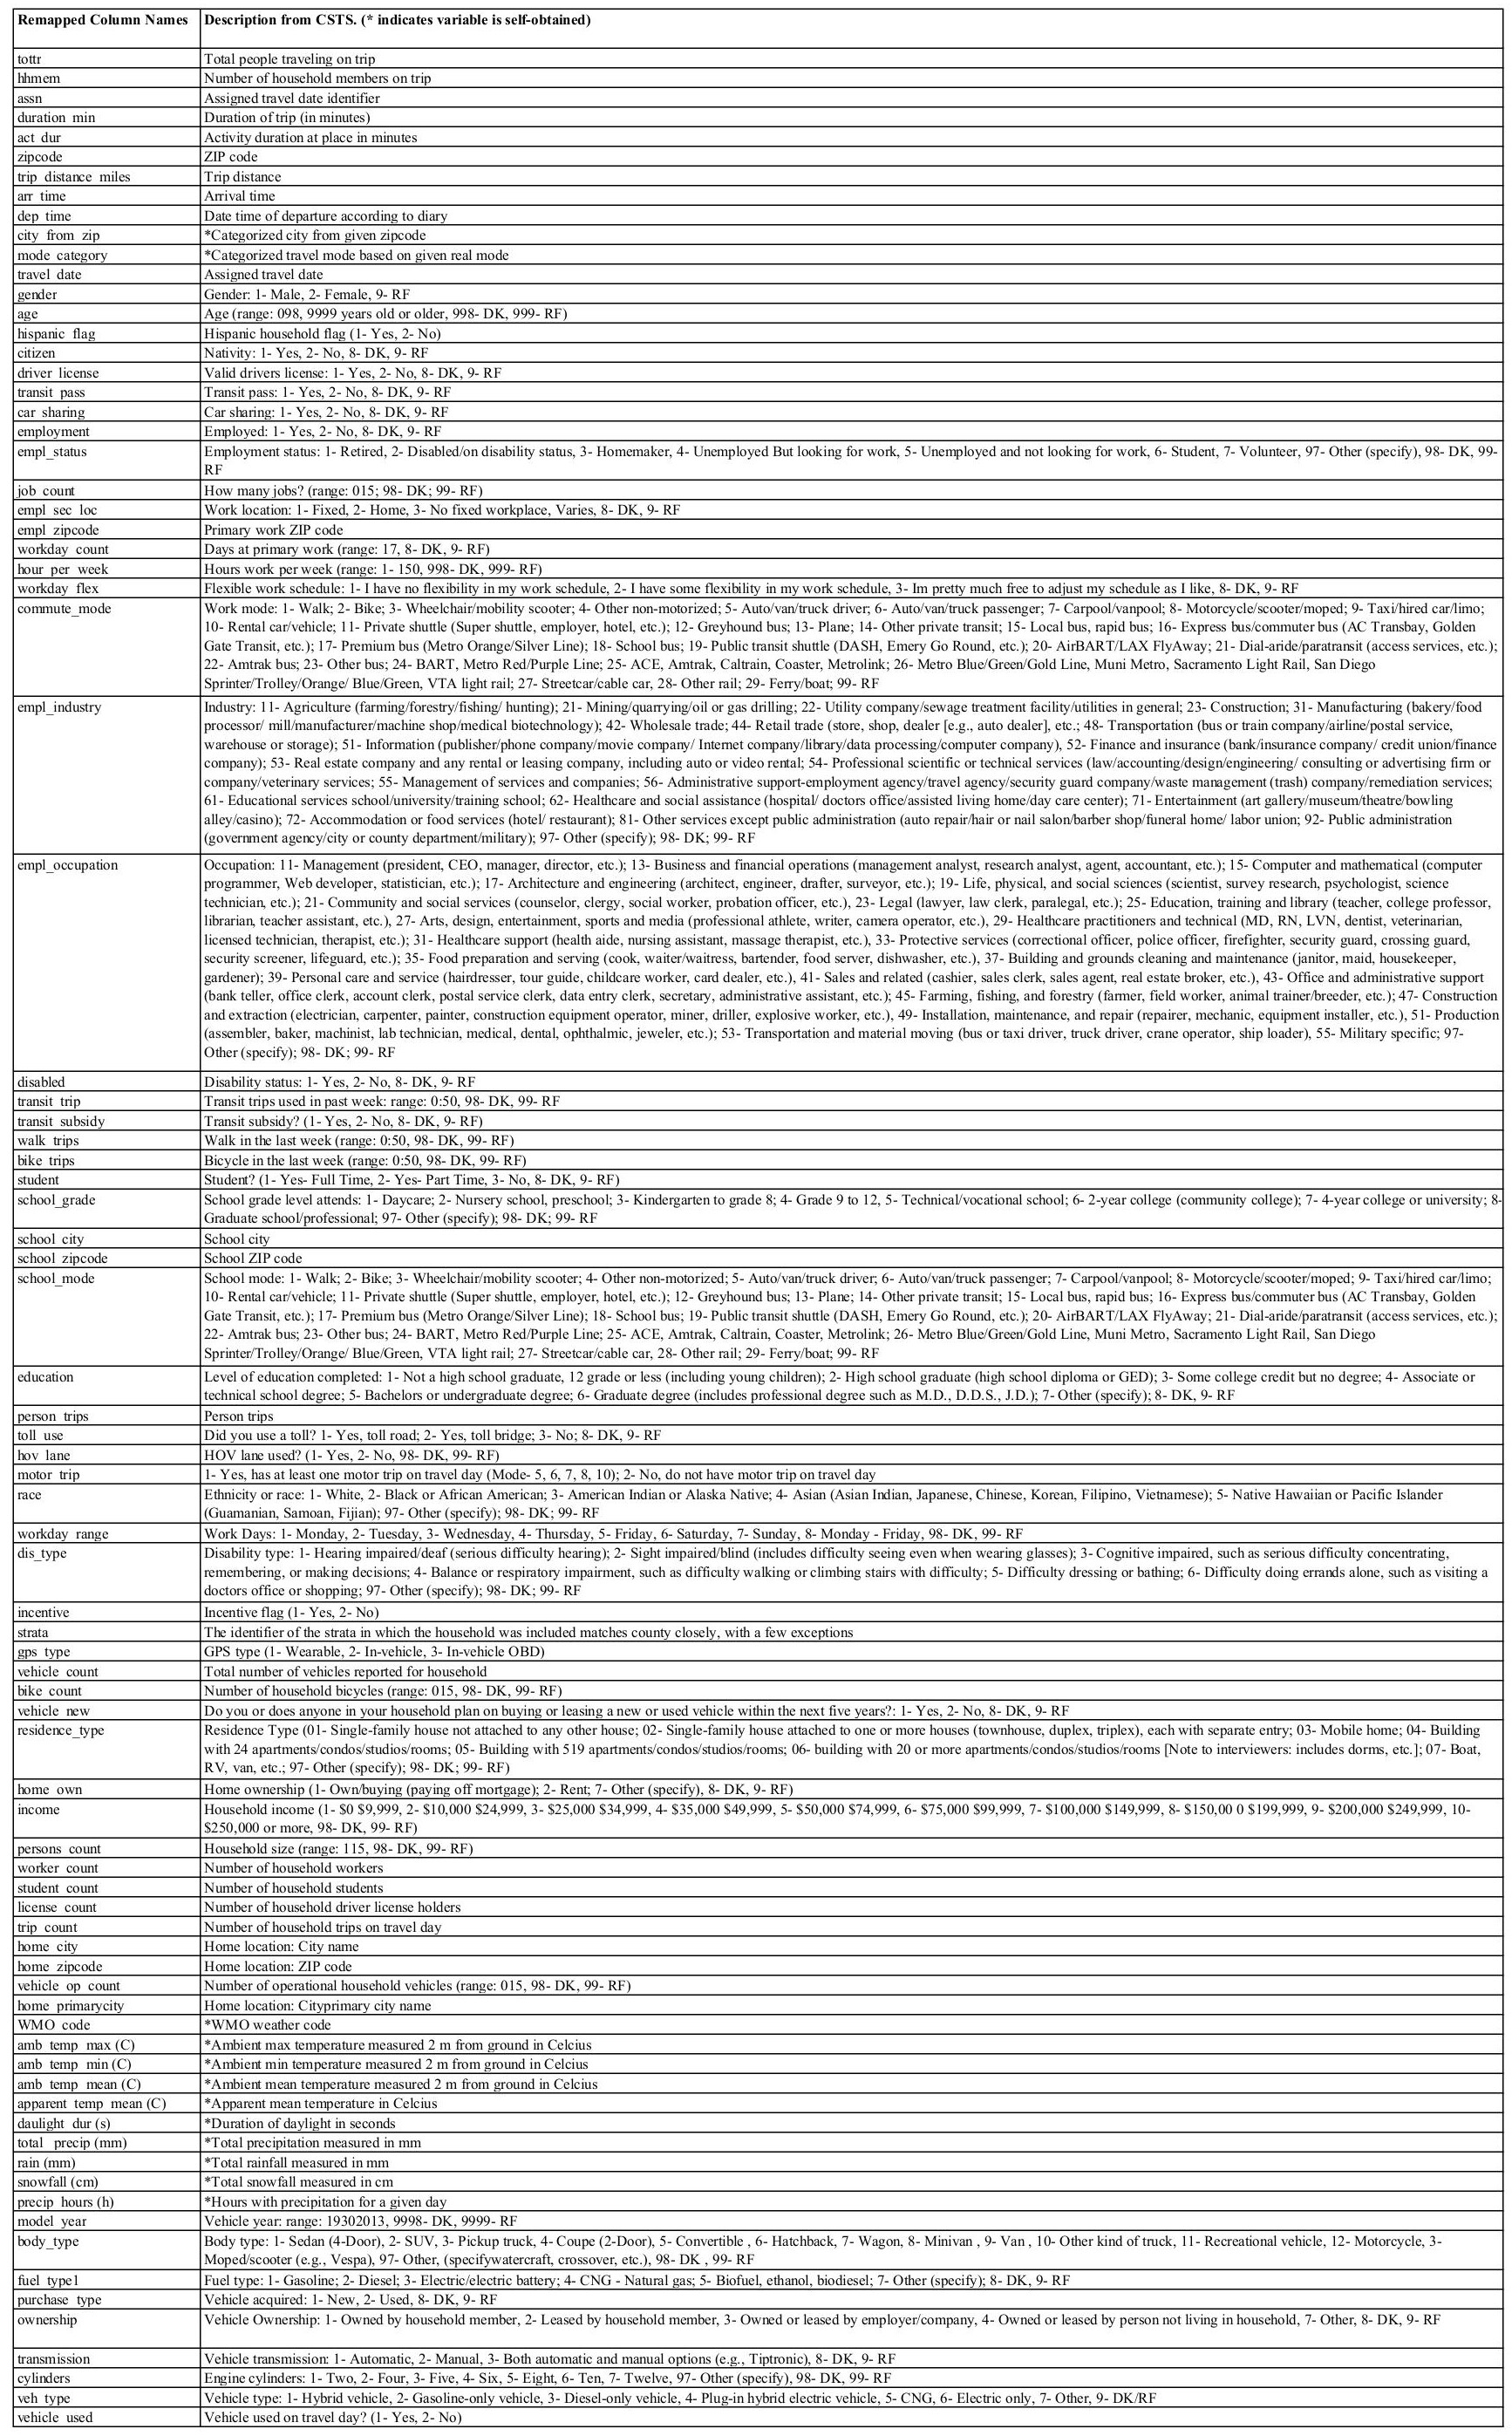

In [20]:
from IPython.display import Image

# Display an image from a file
Image("Column Descriptions.jpg")